## CASE STUDY: TITANIC DATA ANALYSIS

- DataFrames
    - loading & basic analysis
    - sorting & subsetting
    - creating new columns
- Aggregating Data
    - summary statistics
    - counting
    - grouped summary statistics

## 1. Data loading & Basic Analysis

1. Import Libraries

2. Read Titanic Comma Seperated file as `titanic_df`

3. Basic Analysis with `.info()`, `.describe()` methods.

4. Basic Analysis with `.shape`, `.columns`, `.values`, `.index`

### 2. Sorting & SubSetting

5. Sorting Data Set by Single columns `.sort_values()`
- by=""
- ascending=""
- na_position=""

6. Sorting DataSet by Multiple columns `.sort_values()`

7. Subsetting Single column & Multiple columns

8. Subsetting based on Specific Requirements
- Passengers of age greater than 30
- Passengers whose gender is `'Male'` only
- Male Passengers who Survived in the Incident
- Passengers who PClass isin([1,2])
- Give Discounts of 10 percent

## 3. Aggregating Data

#### Summarizing numerical data
- .mean()
- .median()
- .min()
- .maxx()
- .var()
- .std()
- .sum()
- .quantile()

#### .agg() method

- One or more operation on single Or multiple columns
- Function creation = parametrs eg: `def pct30(column):return column.quantile(0.3)`
- Function Calling = Arguments eg: `titanic['Age'].agg(pct30)`

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('./dataset/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def pct30(column):return column.quantile(0.3)

In [4]:
titanic['Age'].mean()

np.float64(29.69911764705882)

In [5]:
titanic['Age'].agg(pct30)

np.float64(22.0)

In [6]:
def pct40(col):return col.quantile(0.4)

In [9]:
pd.DataFrame(titanic['Age'].agg([pct30, pct40]))

,Age
pct30,22.0
pct40,25.0


#### Characteristics of Lamdba function

- One line funtion
- Without name function
- Not used even before
- Not used even after

In [10]:
titanic['Age'].agg(lambda col: col.quantile(0.3))

np.float64(22.0)

In [11]:
titanic['Age'].agg([lambda x: x.quantile(0.3), lambda y: y.quantile(0.4)])

<lambda>    22.0
<lambda>    25.0
Name: Age, dtype: float64

## 4. Cumulative statistics
- .cumsum()
- .cummax()
- .cummin()
- .cumprod()

In [12]:
data = {'Numbers': [2, 5, 3, 7]}

nums = pd.DataFrame(data)
nums

,Numbers
0,2
1,5
2,3
3,7


In [13]:
nums.cumsum()

,Numbers
0,2
1,7
2,10
3,17


In [14]:
nums.cummax()

,Numbers
0,2
1,5
2,5
3,7


In [16]:
nums.cummin()

,Numbers
0,2
1,2
2,2
3,2


In [17]:
nums.cumprod()

,Numbers
0,2
1,10
2,30
3,210


In [20]:
pd.DataFrame(titanic['Age'].cummax().head())

,Age
0,22.0
1,38.0
2,38.0
3,38.0
4,38.0


## 5. Counting

- So far, in this chapter, you've learned how to ``summarize numeric variables``. In below notebook, you'll learn how to ``summarize categorical data`` using counting.

- Categorical variables represent types of **data which may be divided into groups**. Examples of categorical variables are race, sex, age group, and educational

#### Drop Duplicates by Single & Multiple Columns
- drop_duplicates(subset= "")

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
titanic['Cabin'].duplicated

<bound method Series.duplicated of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic.drop_duplicates(subset='Pclass')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [36]:
titanic.drop_duplicates(subset=['Pclass', 'SibSp'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S


#### Getting Count Stats using `.value_counts()`
- sort=False
- normalize=True

In [37]:
titanic['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [38]:
titanic['Age'].count()

np.int64(714)

In [39]:
titanic['Age'].value_counts(sort=False)

Age
22.00    27
38.00    11
26.00    18
35.00    18
54.00     8
         ..
0.67      1
30.50     2
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [41]:
titanic['Age'].value_counts(normalize=True)

Age
24.00    0.042017
22.00    0.037815
18.00    0.036415
28.00    0.035014
30.00    0.035014
           ...   
24.50    0.001401
0.67     0.001401
0.42     0.001401
34.50    0.001401
74.00    0.001401
Name: proportion, Length: 88, dtype: float64

## 6. Group summary statistics

- Average age of Males & Females Using subsetting
- Average age of Males & Females Using `.groupby()`
- Apply Different statistics methods like mean, counts, max & group.

In [45]:
titanic[titanic['Sex'] == 'male']['Age'].mean()

np.float64(30.72664459161148)

In [46]:
titanic[titanic['Sex'] == 'female']['Age'].mean()

np.float64(27.915708812260537)

In [47]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [49]:
titanic.groupby('Sex')[['Age', 'SibSp']].mean()

,Age,SibSp
Sex,,
female,27.915709,0.694268
male,30.726645,0.429809


In [52]:
pd.DataFrame(titanic.groupby(['Survived', 'Sex'])['Age'].mean())

Age
Survived Sex              
0        female  25.046875
         male    31.618056
1        female  28.847716
         male    27.276022

In [53]:
titanic.groupby('Sex')['Age'].agg(['count', 'mean'])

,count,mean
Sex,,
female,261,27.915709
male,453,30.726645


In [54]:
titanic.groupby(['Survived', 'Sex'])['Age'].agg(['count', 'mean'])

count       mean
Survived Sex                     
0        female     64  25.046875
         male      360  31.618056
1        female    197  28.847716
         male       93  27.276022

In [56]:
titanic.groupby(['Survived', 'Sex'])[['Age', 'SibSp']].agg(['count', 'mean', 'median'])

Age                   SibSp                 
                count       mean median count      mean median
Survived Sex                                                  
0        female    64  25.046875   24.5    81  1.209877    1.0
         male     360  31.618056   29.0   468  0.440171    0.0
1        female   197  28.847716   28.0   233  0.515021    0.0
         male      93  27.276022   28.0   109  0.385321    0.0

## Pivot tables

In [ ]:
#titanic.groupby('Sex')['Age'].mean()

- The ``"values"`` argument is the column that you want to ``summarize/Operation``, and the ``"index"`` column is the column that you want to ``group by``. 
- By default, pivot_table takes the **mean** value for each group.

In [58]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [57]:
titanic.pivot_table(values='Age', index='Sex')

,Age
Sex,
female,27.915709
male,30.726645


In [59]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived')

Survived,0,1
Sex,,
female,25.046875,28.847716
male,31.618056,27.276022


In [60]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived', aggfunc='median')

Survived,0,1
Sex,,
female,24.5,28.0
male,29.0,28.0


In [61]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived', aggfunc=['median', 'std'])

median              std           
Survived      0     1          0          1
Sex                                        
female     24.5  28.0  13.618591  14.175073
male       29.0  28.0  14.056019  16.504803

In [62]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived', aggfunc=['median', 'std'], fill_value=0)

median              std           
Survived      0     1          0          1
Sex                                        
female     24.5  28.0  13.618591  14.175073
male       29.0  28.0  14.056019  16.504803

In [63]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived', aggfunc=['median', 'std'], fill_value=0, margins=True)

median                    std                      
Survived      0     1   All          0          1        All
Sex                                                         
female     24.5  28.0  27.0  13.618591  14.175073  14.110146
male       29.0  28.0  29.0  14.056019  16.504803  14.678201
All        28.0  28.0  28.0  14.172110  14.950952  14.526497

In [64]:
titanic.pivot_table(values='Age', index='Sex', columns='Survived', aggfunc=['median', 'std'], fill_value=0, margins=True, margins_name='median')

median                     std                      
Survived      0     1 median          0          1     median
Sex                                                          
female     24.5  28.0   27.0  13.618591  14.175073  14.110146
male       29.0  28.0   29.0  14.056019  16.504803  14.678201
median     28.0  28.0   28.0  14.172110  14.950952  14.526497

In [82]:
titanic = titanic.set_index('Name')
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [83]:
titanic = titanic.reset_index(drop=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [84]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Data Visualization With Pandas

In [86]:
import matplotlib.pyplot as plt

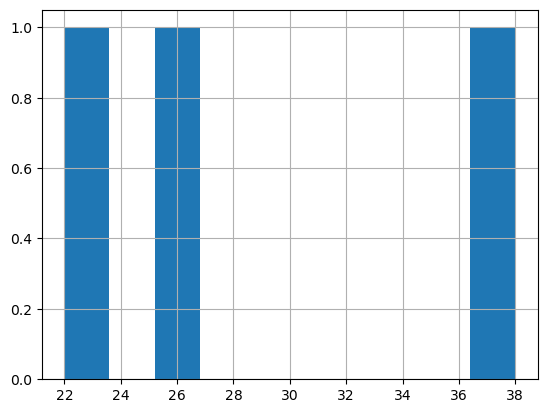

In [87]:
titanic['Age'].hist()
plt.show()

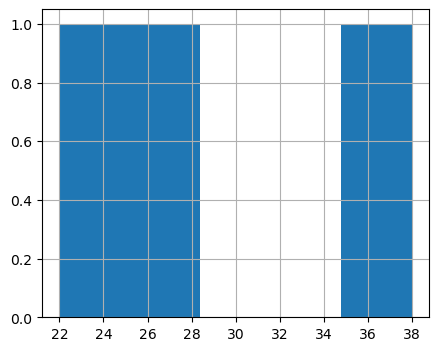

In [101]:
plt.figure(figsize=(5, 4))
titanic['Age'].hist(bins=5)
plt.show()

In [97]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


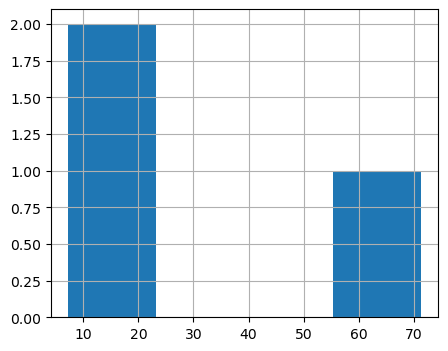

In [100]:
plt.figure(figsize=(5, 4))
titanic['Fare'].hist(bins=4)
plt.show()